## Project Title: Heart Disease Prediciton Using machine learning

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# loading dataset
df=pd.read_csv("heart.csv")
print(df.head())
print(df.info())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-

Text(0.5, 1.0, 'Heart Disease by Gender')

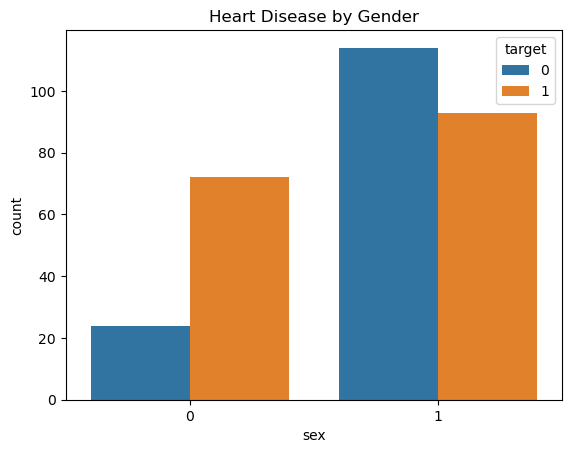

In [6]:
# Exploratory data Analysis(EDA)
# Visual 1: Heart disease by gender

sns.countplot(data=df,x="sex",hue='target')
plt.title("Heart Disease by Gender")

<Axes: >

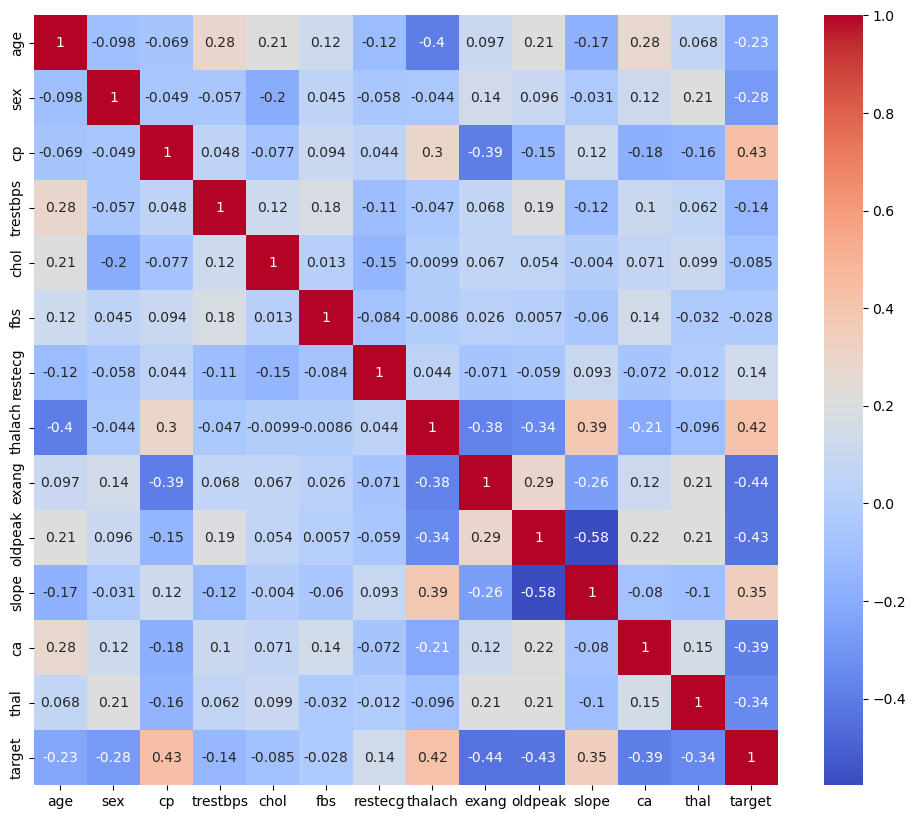

In [7]:
# Visual 2: Correlation of Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm")


Text(0.5, 1.0, 'Age vs max heart rate (Thalach)')

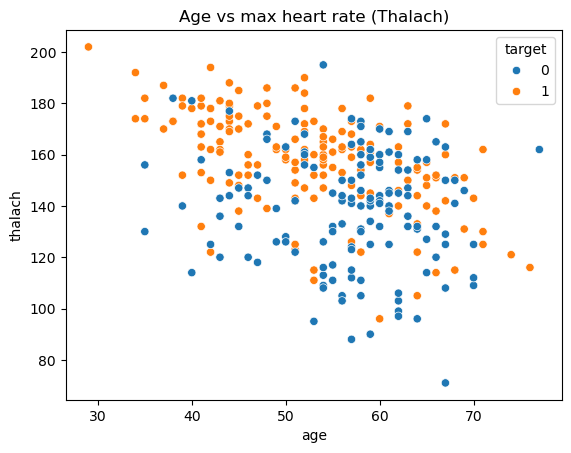

In [8]:
# Visual 3: Age vs Max heart rate

sns.scatterplot(x='age',y='thalach',hue='target',data=df)
plt.title("Age vs max heart rate (Thalach)")

In [19]:
# Data Preprocessing 
x=df.drop('target',axis=1)
y=df['target']

# feature scaling
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)

# train-test split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [20]:
# Model Training and Testing
# Logistic Regression

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("LogisticRegression Accouracy: ", accuracy_score(y_test,y_pred))
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


LogisticRegression Accouracy:  0.8524590163934426
(242, 13) (242,)
(61, 13) (61,)


In [21]:
# Randome Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print("RandomForest Accuracy: ", accuracy_score(y_test,y_pred_rf))

RandomForest Accuracy:  0.8524590163934426


In [24]:
# Evaluation
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred_rf))
print("\n Classification Report:\n", classification_report(y_test,y_pred_rf))

confusion_matrix:
 [[24  5]
 [ 4 28]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

